In [91]:
import numpy as np
%run Dolphins_data.ipynb
import sys
sys.path.append('../') # Change path
from Functions import * # Import Gradient_function

In [92]:
dim = 3 # Define the dimension

In [93]:
mu = np.zeros(dim) # Define mean (mu) as a zero vector
identity_matrix = np.eye(dim) # dim x dim identity matrix
cov_matrix = 0.5 * identity_matrix + 0.5 # Define covariance matrix
num_samples = 62  # Number of samples you want to generate

points = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)}

In [94]:
n = 50 # Number of iterations
graf = np.zeros(n)
for k in range(n):
    for i in range(1,num_samples+1): # Run over number of num_samples
        for j in range(dim): # Run over dimension
            points[i][j] += 0.1*Gradient_function(i,j,Y,points) # Use Gradient_function and take step=0.1*grad
            
    graf[k] = Loss_function(points,Y) # Calcualte the probability using Loss_function

Text(0.5, 0, 'Iterration')

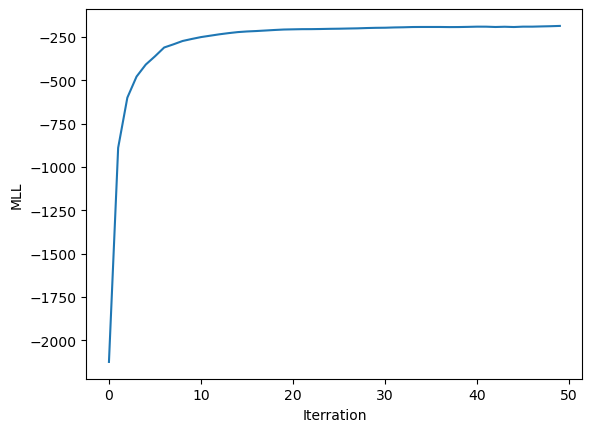

In [95]:
plt.plot(graf)
plt.ylabel('MLL')
plt.xlabel('Iterration')

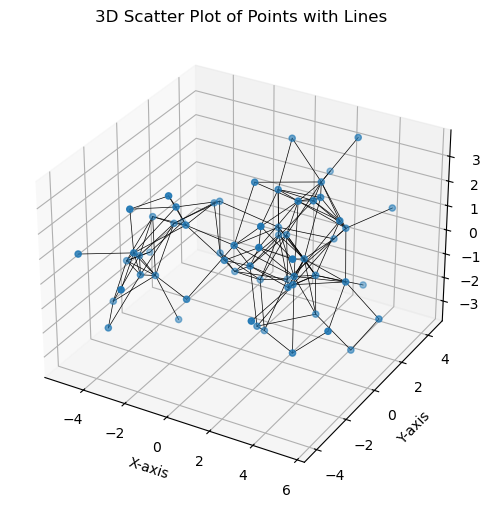

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for m in range(len(Y)):
    if Y[m][0] == 1:
        point1 = points[Y[m][1]]
        point2 = points[Y[m][2]]
        ax.plot([point1[0], point2[0]], [point1[1], point2[1]], [point1[2], point2[2]], color='black', linewidth=0.5)

# Scatter plot of points in 3D
x = [point[0] for point in points.values()]
y = [point[1] for point in points.values()]
z = [point[2] for point in points.values()]
ax.scatter(x, y, z)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Scatter Plot of Points with Lines')
ax.grid(True)

plt.show()
